# Policing

In [35]:
import geopandas as gpd
import contextily as ctx

In [24]:
gpd.list_layers('data/policebeats.zip')

,name,geometry_type
0,policebeats,Polygon


In [25]:
pbs = gpd.read_file('data/policebeats.zip').to_crs(4267)
pbs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID_1  159 non-null    int64   
 1   OBJECTID    159 non-null    int64   
 2   BEAT        138 non-null    object  
 3   SECTOR      159 non-null    int64   
 4   AREA_COMMA  152 non-null    object  
 5   SERVICE     159 non-null    object  
 6   AGENCY      159 non-null    object  
 7   RD_AREA     159 non-null    object  
 8   GROUP_      159 non-null    object  
 9   ADJACENTS   50 non-null     object  
 10  SHAPE_Leng  159 non-null    float64 
 11  STAr        159 non-null    float64 
 12  STLe        159 non-null    float64 
 13  geometry    159 non-null    geometry
dtypes: float64(3), geometry(1), int64(3), object(7)
memory usage: 17.5+ KB


In [26]:
import contextily as ctx

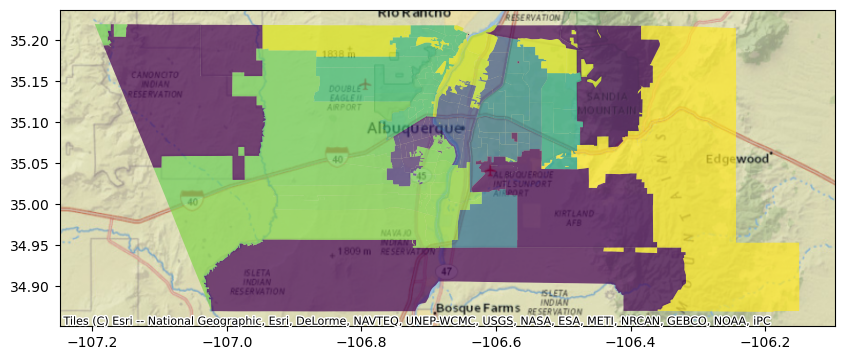

In [27]:
ax = pbs.plot(alpha=0.7, column='SECTOR', figsize=(10,8))
ctx.add_basemap(ax, crs=pbs.crs, source=ctx.providers.Esri.NatGeoWorldMap);

In [28]:
pbs.iloc[14]

OBJECTID_1                                                   15
OBJECTID                                                     15
BEAT                                                        122
SECTOR                                                       12
AREA_COMMA                                            SOUTHWEST
SERVICE                                                       P
AGENCY                                                      APD
RD_AREA                                                     122
GROUP_                                                       SW
ADJACENTS                                                  None
SHAPE_Leng                                         17638.088873
STAr                                              14412999.1033
STLe                                               17638.293549
geometry      POLYGON ((-106.7326456656925 35.05714438143375...
Name: 14, dtype: object

In [29]:
pbs.drop(columns=['STLe', 'STAr', 'SHAPE_Leng', 'OBJECTID_1'], inplace=True)
pbs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    159 non-null    int64   
 1   BEAT        138 non-null    object  
 2   SECTOR      159 non-null    int64   
 3   AREA_COMMA  152 non-null    object  
 4   SERVICE     159 non-null    object  
 5   AGENCY      159 non-null    object  
 6   RD_AREA     159 non-null    object  
 7   GROUP_      159 non-null    object  
 8   ADJACENTS   50 non-null     object  
 9   geometry    159 non-null    geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 12.6+ KB


In [30]:
pbs.SECTOR = pbs.SECTOR.astype(str)

In [31]:
name_changes = dict(
    BEAT = 'Beat', 
    SECTOR = 'Sector', 
    AREA_COMMA = 'Area',
    SERVICE = 'Service', 
    AGENCY = 'Agency', 
    RD_AREA = 'RDArea', 
    GROUP_ = 'Group', 
    ADJACENTS = 'Adjacents'
)

In [32]:
pbs.rename(columns=name_changes, inplace=True)
pbs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   159 non-null    int64   
 1   Beat       138 non-null    object  
 2   Sector     159 non-null    object  
 3   Area       152 non-null    object  
 4   Service    159 non-null    object  
 5   Agency     159 non-null    object  
 6   RDArea     159 non-null    object  
 7   Group      159 non-null    object  
 8   Adjacents  50 non-null     object  
 9   geometry   159 non-null    geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 12.6+ KB


In [34]:
pbs.Sector.unique()

array(['0', '13', '12', '52', '22', '32', '33', '11', '23', '42', '63',
       '53', '41', '24', '62', '43', '61', '74', '73', '75', '86', '72',
       '71', '91', '82', '83', '85', '84', '81'], dtype=object)

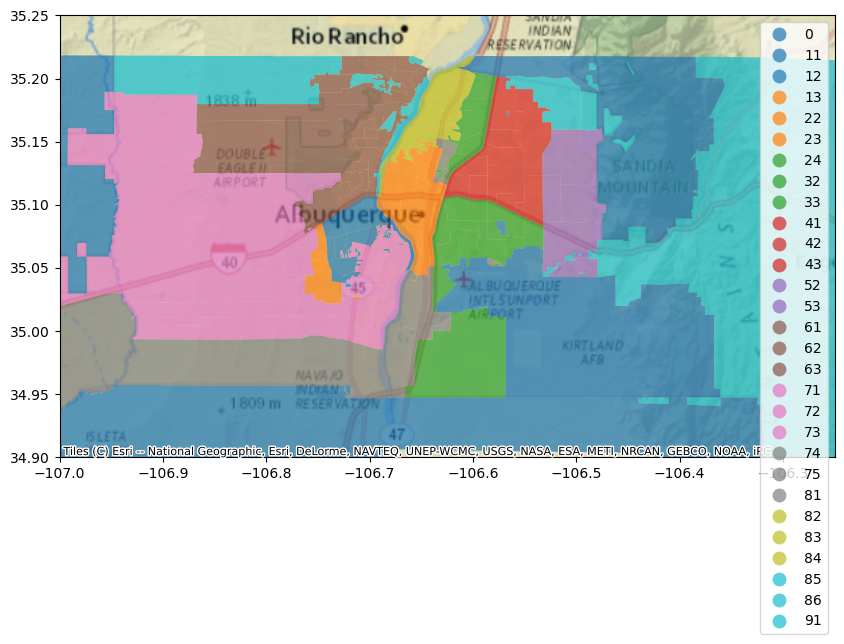

In [38]:
ax = pbs.plot(figsize=(10,8), alpha=0.7, column='Sector', legend=True)
ax.set_ylim(34.9, 35.25)
ax.set_xlim(-107.0, -106.25)
ctx.add_basemap(ax, crs=pbs.crs, source=ctx.providers.Esri.NatGeoWorldMap);

In [39]:
pbs.to_file('../../../data/local/abq_city_data.gpkg', layer='policing')
pbs.to_file('../../../localData/policing.gpkg')